In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen

# Task 1

In [52]:
x0 = [0.5, 0]
bnds = ((0, 1), (-0.5, 2))
cons = ({'type': 'eq'  , 'fun': lambda x:  -(2 * x[0] + x[1] - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] + 2 * x[1] - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] ** 2 + x[1] - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] ** 2 - x[1] - 1)})
res = minimize(rosen, x0, method="trust-constr", bounds=bnds, constraints=cons)
res


/home/andredon/projects/University/OMAutumn25/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:728: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.3427175748433837
                 x: [ 4.149e-01  1.701e-01]
               nit: 18
              nfev: 33
              njev: 11
              nhev: 0
          cg_niter: 10
      cg_stop_cond: 1
              grad: [-8.270e-01 -4.135e-01]
   lagrangian_grad: [ 1.772e-09 -3.544e-09]
            constr: [array([-0.000e+00]), array([ 2.448e-01]), array([ 6.577e-01]), array([ 9.979e-01]), array([ 4.149e-01,  1.701e-01])]
               jac: [array([[-2.000e+00, -1.000e+00]]), array([[-1.000e+00, -2.000e+00]]), array([[-8.299e-01, -1.000e+00]]), array([[-8.299e-01,  1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,  1.000e+00]])]
       constr_nfev: [33, 33, 33, 33, 0]
       constr_njev: [0, 0, 0, 0, 0]
       constr_nhev: [0, 0, 0, 0, 0]
                 v: [array([-4.135e-01]), array([-5.317e-06]), array([-1.951e-06]), 

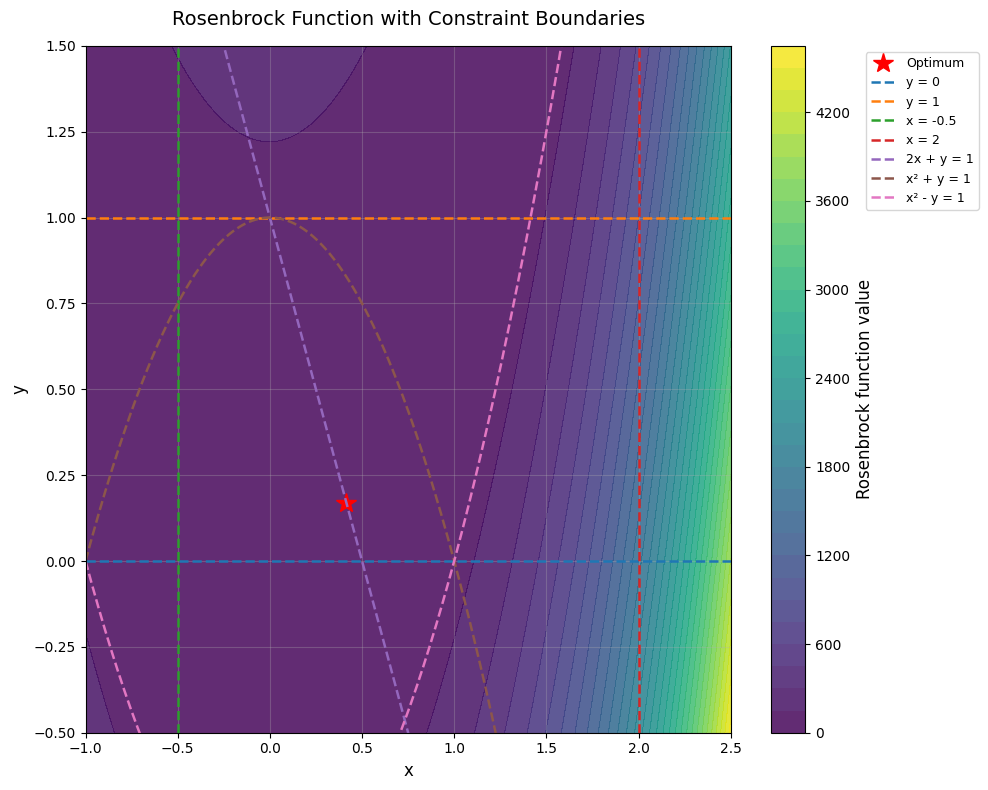

In [53]:
n_points = 400
xs, xe = -1, 2.5
ys, ye = -0.5, 1.5

x = np.linspace(xs, xe, n_points)
y = np.linspace(ys, ye, n_points)
X, Y = np.meshgrid(x, y)
Z = rosen([X, Y])

plt.figure(figsize=(10, 8))
contours = plt.contourf(X, Y, Z, levels=30, cmap="viridis", alpha=0.85)
cbar = plt.colorbar(contours)
cbar.set_label("Rosenbrock function value", fontsize=12)

plt.plot(res.x[0], res.x[1], 'r*', markersize=15, label="Optimum")

x_line = np.linspace(xs, xe, n_points)
constraints = {
    "y = 0": lambda x: np.zeros_like(x),
    "y = 1": lambda x: np.ones_like(x),
    "x = -0.5": lambda _: np.linspace(ys, ye, n_points),
    "x = 2": lambda _: np.linspace(ys, ye, n_points),
    "2x + y = 1": lambda x: 1 - 2 * x,
    "x² + y = 1": lambda x: 1 - x**2,
    "x² - y = 1": lambda x: x**2 - 1,
}

for label, func in constraints.items():
    if "x =" in label:
        x_const = float(label.split("=")[1])
        plt.plot([x_const] * n_points, func(x_const), "--", lw=1.8, label=label)
    else:
        plt.plot(x_line, func(x_line), "--", lw=1.8, label=label)

plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Rosenbrock Function with Constraint Boundaries", fontsize=14, pad=15)
plt.xlim(xs, xe)
plt.ylim(ys, ye)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.2, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


# Task 2

In [54]:
x0 = [0.5, 0.5]
cons = ({'type': 'eq'  , 'fun': lambda x:  -(x[0]**2 + x[1]**2 - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] + 2 * x[1] - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] ** 2 + x[1] - 1)},
        {'type': 'ineq', 'fun': lambda x:  -(x[0] ** 2 - x[1] - 1)})
fun = lambda x: x[0]**2 + x[1]**2 + x[0]*x[1] + x[0] + x[1]

res = minimize(fun, x0, method="slsqp", constraints=cons)
res

     message: Inequality constraints incompatible
     success: False
      status: 4
         fun: 2.0803459611671618
           x: [ 1.027e+00  1.176e-13]
         nit: 4
         jac: [ 3.053e+00  2.027e+00]
        nfev: 14
        njev: 4
 multipliers: [-8.719e+03  0.000e+00  6.748e+03  1.970e+03]

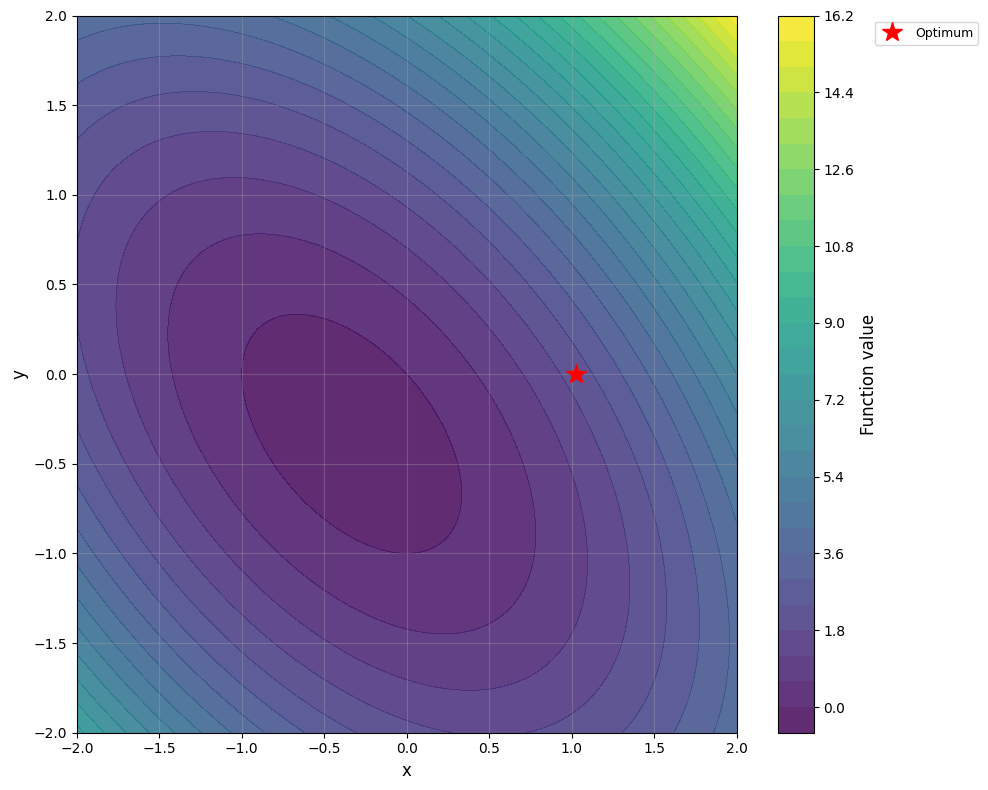

In [55]:
n_points = 400
xs, xe = -2, 2
ys, ye = -2, 2

x = np.linspace(xs, xe, n_points)
y = np.linspace(ys, ye, n_points)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + X*Y + X + Y

plt.figure(figsize=(10, 8))
contours = plt.contourf(X, Y, Z, levels=30, cmap="viridis", alpha=0.85)
cbar = plt.colorbar(contours)
cbar.set_label("Function value", fontsize=12)

plt.plot(res.x[0], res.x[1], 'r*', markersize=15, label="Optimum")

x_line = np.linspace(xs, xe, n_points)

plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlim(xs, xe)
plt.ylim(ys, ye)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.2, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()


# Task 3

In [ ]:
mu = np.array([0.08, 0.12, 0.1])